# Sampling in Python

+ There are different packages that allow sampling.
+ A practical approach is to use pandas/Dask sampling methods.

## Random Sampling

+ Sample n rows from a dataframe with [`df.sample()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html).

```
DataFrame.sample(
    n=None, frac=None, replace=False, weights=None, 
    random_state=None, axis=None, ignore_index=False
    )
```

In [12]:
%load_ext dotenv
%dotenv
import os
import sys
sys.path.append(os.path.join ('../', os.getenv('SRC_DIR')))

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


In [13]:
from logger import get_logger
_logs = get_logger(__name__)

In [14]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
from glob import glob

c:\Users\Igor\.conda\envs\dsi_participant\lib\site-packages\dask\dataframe\_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(
C:\Users\Igor\AppData\Local\Temp\ipykernel_4380\2759434526.py:1: DeprecationWarning: The current Dask DataFrame implementation is deprecated. 
In a future release, Dask DataFrame will use new implementation that
contains several improvements including a logical query planning.
The user-facing DataFrame API will remain unchanged.

The new implementation is already available and can be enabled by
installing the dask-expr library:

    $ pip install dask-expr

and turning the query planning option on:

    >>> import dask
    >>> dask.config.set({'dataframe.query-planning': True})
    >>> import dask.dataframe as dd

API documentation for the new implementation is available at
https://docs.dask.org/en/stable/dask-expr-api.html

Any feedback can be repor

Look at the distribution of tickers.

In [33]:
ft_dir = os.path.join("../", os.getenv('FEATURES_DATA'))
ft_files_path = os.path.join(ft_dir+'/*.parquet')
tickers_df = dd.read_parquet(ft_files_path).compute().reset_index()


In [73]:
tickers_df.sample(frac=0.005, random_state=0)

,ticker,Date,Open,High,Low,Close,Adj Close,Volume,sector,subsector,year,Close_lag_1,returns,positive_return,target
273379,MSFT,2007-07-31,29.709999,29.719999,28.980000,28.990000,20.875898,66554000,Information Technology,Systems Software,2007,29.400000,-0.013946,0,1.0
254837,MCO,2017-08-04,129.110001,129.589996,128.300003,129.289993,121.124573,878000,Financials,Financial Exchanges & Data,2017,128.720001,0.004428,1,0.0
148900,TRV,2013-09-13,83.410004,83.910004,83.230003,83.559998,65.344620,1198600,Financials,Property & Casualty Insurance,2013,83.120003,0.005293,1,1.0
1295291,FAST,2020-06-05,42.060001,42.889999,41.779999,42.660000,38.290211,6166500,Industrials,Trading Companies & Distributors,2020,41.700001,0.023022,1,1.0
2072327,CHD,2002-02-20,5.041667,5.265000,5.041667,5.255000,4.015594,906600,Consumer Staples,Household Products,2002,5.058333,0.038880,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758049,QRVO,2017-06-14,74.919998,75.309998,70.879997,72.129997,72.129997,2132500,Information Technology,Semiconductors,2017,74.650002,-0.033758,0,0.0
1994404,AON,2003-09-23,21.490000,21.780001,21.440001,21.719999,16.540854,399900,Financials,Insurance Brokers,2003,21.559999,0.007421,1,0.0
622099,LHX,2010-02-23,47.009998,47.320000,46.410000,46.540001,33.793789,464800,Industrials,Aerospace & Defense,2010,47.049999,-0.010839,0,0.0
468510,RTX,2008-05-08,46.161106,46.784142,46.085587,46.607929,31.460804,6079355,Industrials,Aerospace & Defense,2008,45.959724,0.014104,1,0.0


In [62]:
select_tickers = ['OXY', 'TXN', 'PCG', 'CBRE', 'ROK', 'AMT', 'D', 'YUM', 'PWR']
select_tickers

['OXY', 'TXN', 'PCG', 'CBRE', 'ROK', 'AMT', 'D', 'YUM', 'PWR']

In [66]:
idx = tickers_df['ticker'].isin(select_tickers)
selected_tickers_df = tickers_df [idx]
simp_samp = selected_tickers_df.sample(frac = 0.15)
simp_samp.shape, selected_tickers_df.shape
                                       

((8154, 15), (54362, 15))

<Axes: xlabel='ticker'>

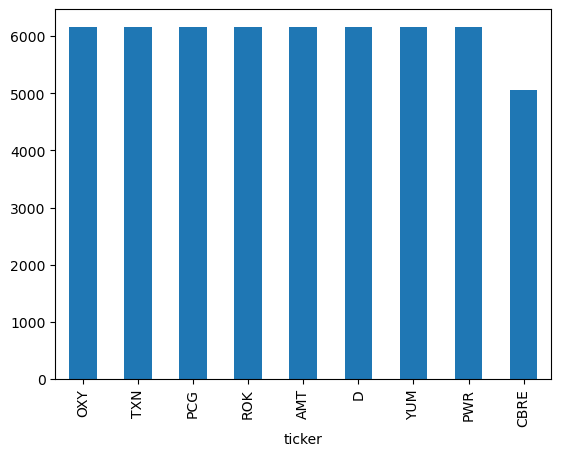

In [69]:
selected_tickers_df['ticker'].value_counts().plot(kind='bar')

<Axes: xlabel='ticker'>

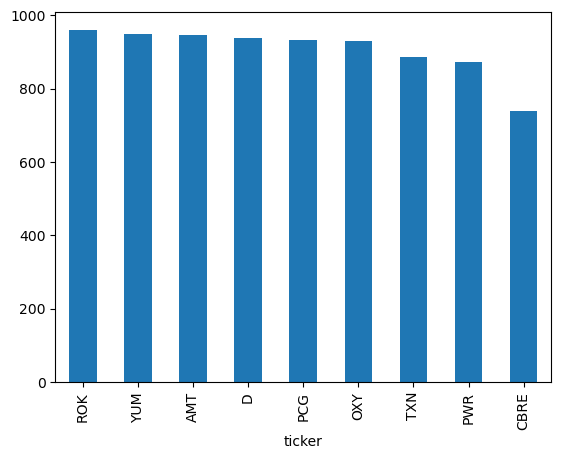

In [68]:
simp_samp['ticker'].value_counts().plot(kind='bar')

## Stratified Sampling

+ Use `groupby()` and `.sample()` for stratified sampling.

<Axes: xlabel='ticker'>

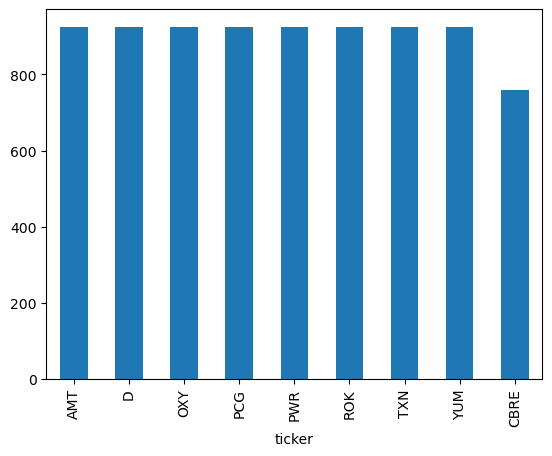

In [70]:
strat_samp = selected_tickers_df.groupby(['ticker']).sample(frac = 0.15)
strat_samp['ticker'].value_counts().plot(kind='bar')

In [95]:
strat_samp

,ticker,Date,Open,High,Low,Close,Adj Close,Volume,sector,subsector,year,Close_lag_1,returns,positive_return,target
29946,AMT,2000-12-13,39.375000,39.500000,37.187500,37.562500,28.889984,572900,Real Estate,Telecom Tower REITs,2000,39.000000,-0.036859,0,0.0
35319,AMT,2022-04-25,262.100006,263.000000,255.110001,259.519989,241.658890,1656800,Real Estate,Telecom Tower REITs,2022,261.899994,-0.009087,0,0.0
35605,AMT,2023-06-14,192.250000,193.770004,190.289993,193.020004,184.837189,2510000,Real Estate,Telecom Tower REITs,2023,191.020004,0.010470,1,1.0
33587,AMT,2015-06-09,92.860001,93.029999,91.989998,92.070000,74.665123,2406500,Real Estate,Telecom Tower REITs,2015,92.830002,-0.008187,0,1.0
32604,AMT,2011-07-12,52.910000,53.419998,52.720001,52.910000,40.694023,1547800,Real Estate,Telecom Tower REITs,2011,53.060001,-0.002827,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48052,YUM,2023-12-04,126.419998,127.449997,124.370003,125.650002,124.412933,2911500,Consumer Discretionary,Restaurants,2023,127.330002,-0.013194,0,0.0
46404,YUM,2017-05-17,69.349998,69.379997,68.790001,69.160004,61.032295,1798500,Consumer Discretionary,Restaurants,2017,69.349998,-0.002740,0,0.0
44754,YUM,2010-10-26,35.780014,35.873470,35.593098,35.808769,27.642944,3046429,Consumer Discretionary,Restaurants,2010,35.859093,-0.001403,0,0.0
42086,YUM,2000-03-17,5.908519,5.908519,5.616463,5.616463,3.900679,7712260,Consumer Discretionary,Restaurants,2000,5.908519,-0.049430,0,0.0


# Sampling in Dask

+ Stratified sampling in `dask` can be achieved with `groupby().apply()` and a lambda function.

In [74]:
dd_dt = dd.read_parquet(ft_files_path)
strat_samp_dd = (dd_dt
                 .groupby('ticker', group_keys=False)
                 .apply(lambda x: x.sample(frac=0.15))
                 .compute()
                 .reset_index())
strat_samp_dd

C:\Users\Igor\AppData\Local\Temp\ipykernel_4380\2526687736.py:2: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  strat_samp_dd = (dd_dt


,ticker,Date,Open,High,Low,Close,Adj Close,Volume,sector,subsector,year,Close_lag_1,returns,positive_return,target
0,LYB,2010-06-24,16.690001,16.920000,16.350000,16.799999,7.761838,2151600,Materials,Specialty Chemicals,2010,16.650000,0.009009,1,1.0
1,LYB,2022-09-01,82.169998,82.419998,80.739998,81.860001,74.639885,2334700,Materials,Specialty Chemicals,2022,83.000000,-0.013735,0,0.0
2,LYB,2011-04-19,40.049999,41.070000,39.849998,40.779999,18.840939,3088000,Materials,Specialty Chemicals,2011,40.060001,0.017973,1,1.0
3,LYB,2017-04-19,86.300003,86.989998,85.230003,85.529999,57.833221,2426800,Materials,Specialty Chemicals,2017,85.839996,-0.003611,0,0.0
4,LYB,2020-07-02,67.120003,68.769997,66.110001,66.959999,52.443295,2279000,Materials,Specialty Chemicals,2020,65.610001,0.020576,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412312,WY,2005-03-30,67.150002,68.110001,67.129997,67.879997,12.925506,1093500,Real Estate,Timber REITs,2005,67.070000,0.012077,1,1.0
412313,WY,2010-06-11,39.820000,41.099998,39.820000,41.009998,9.132317,1909400,Real Estate,Timber REITs,2010,40.200001,0.020149,1,0.0
412314,WY,2023-07-14,33.990002,34.160000,33.740002,34.080002,33.120045,1990800,Real Estate,Timber REITs,2023,34.150002,-0.002050,0,1.0
412315,WY,2019-01-24,24.280001,25.299999,24.280001,25.170000,20.071115,6461100,Real Estate,Timber REITs,2019,24.290001,0.036229,1,1.0


In [97]:
strat_samp_dd_sel_tickers = strat_samp_dd[strat_samp_dd['ticker'].isin(select_tickers)]['ticker']
strat_samp_dd_sel_tickers

19367      PCG
19368      PCG
19369      PCG
19370      PCG
19371      PCG
          ... 
341303    CBRE
341304    CBRE
341305    CBRE
341306    CBRE
341307    CBRE
Name: ticker, Length: 8158, dtype: object

<Axes: xlabel='ticker'>

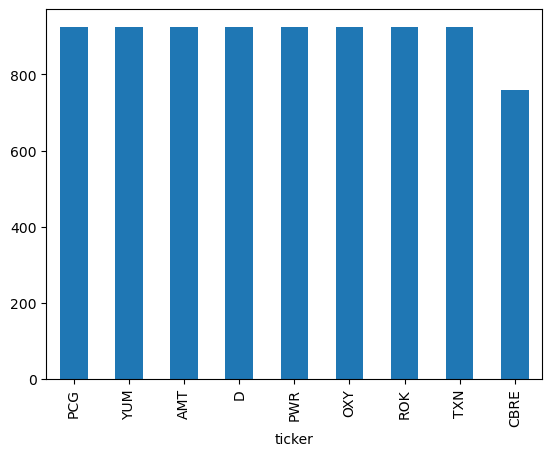

In [98]:
strat_samp_dd_sel_tickers.value_counts().plot(kind='bar')

In [77]:
strat_samp_dd['ticker'].value_counts()

ticker
BDX     925
AMGN    925
BALL    925
VLO     925
CHD     925
       ... 
ABNB    134
CEG      93
GEHC     58
KVUE     44
VLTO     28
Name: count, Length: 499, dtype: int64

In [94]:
ticker_list = strat_samp_dd['ticker'].unique()
ticker_list

array(['LYB', 'ETN', 'RF', 'EW', 'PPG', 'UDR', 'EXR', 'AMAT', 'GM',
       'AKAM', 'WFC', 'KMB', 'VMC', 'FAST', 'ORLY', 'WST', 'BIIB', 'CMA',
       'HIG', 'BLK', 'AON', 'ROP', 'PCG', 'TJX', 'TRV', 'CCL', 'EQR',
       'PKG', 'CPT', 'PARA', 'VRSK', 'LULU', 'MKTX', 'CRL', 'META',
       'PAYX', 'V', 'MTB', 'FE', 'INTC', 'AIZ', 'HUBB', 'L', 'RJF', 'GLW',
       'YUM', 'MA', 'PODD', 'ECL', 'EQIX', 'SNA', 'F', 'HSIC', 'GOOGL',
       'EXPE', 'DTE', 'NDSN', 'SNPS', 'PGR', 'POOL', 'AMT', 'CHTR',
       'ABBV', 'MOS', 'FITB', 'GPC', 'MKC', 'AEP', 'PAYC', 'BA', 'OKE',
       'ORCL', 'UPS', 'ANET', 'ITW', 'NTRS', 'GL', 'BEN', 'TDY', 'MMC',
       'WTW', 'TAP', 'ARE', 'EQT', 'RHI', 'SHW', 'WYNN', 'AME', 'C',
       'AOS', 'TPR', 'IPG', 'IP', 'HOLX', 'DG', 'ADBE', 'EMR', 'REGN',
       'PANW', 'VICI', 'HON', 'KEY', 'PHM', 'PPL', 'CSCO', 'ADM', 'DGX',
       'NDAQ', 'CPB', 'WRK', 'KVUE', 'FSLR', 'MLM', 'DPZ', 'FDX', 'TRMB',
       'MRK', 'STE', 'FIS', 'FI', 'LVS', 'MTCH', 'NCLH', 'MSI', 'MOH',
   